In [1]:
%matplotlib inline

In [2]:
from pyspark.sql import SparkSession
import os

In [3]:
spark = SparkSession \
    .builder \
    .appName('Project 4 Dashboard') \
    .getOrCreate()

In [4]:
data_path = '/data/parquet/'
table_names = ['songs', 'artists', 'users', 'time', 'songplays']

for name in table_names:
    df = spark.read.parquet(os.path.join(data_path, f'{name}_table.parquet'))
    df.createOrReplaceTempView(name)

### User Account Level

In [5]:
spark.sql('''
    SELECT level, COUNT(*) as total 
    FROM users 
    GROUP BY level
    ORDER BY level
''').toPandas().set_index('level')

,total
level,
free,78
paid,19


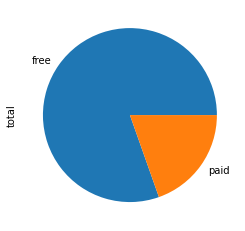

In [6]:
_.plot.pie(y='total', legend=False)

### User Gender

In [7]:
spark.sql('''
    SELECT gender, COUNT(*) as total
    FROM users 
    GROUP BY gender
    ORDER BY gender
''') .toPandas().set_index('gender')

,total
gender,
F,55
M,42


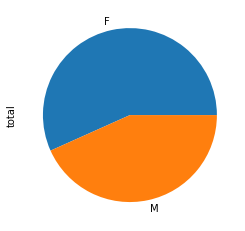

In [8]:
_.plot.pie(y='total', legend=False)

### User Operating System

In [9]:
spark.sql('''
    SELECT 
        CASE
            WHEN user_agent LIKE '%Linux%' THEN 'Linux'
            WHEN user_agent LIKE '%Mac%' THEN 'MacOS'
            WHEN user_agent LIKE '%Windows%' THEN 'Windows'
            ELSE 'Unknown'
        END AS os,
        COUNT(*) as total
    FROM (
        SELECT DISTINCT user_id, user_agent
        FROM songplays
    )
    GROUP BY os
    ORDER BY total DESC
''') .toPandas().set_index('os')

,total
os,
MacOS,47
Windows,44
Linux,5


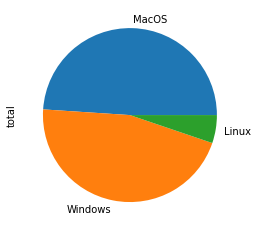

In [10]:
_.plot.pie(y='total', legend=False)

### Most Popular Times Per Time of Day

In [11]:
spark.sql('''
    SELECT t.hour, COUNT(*) as total
    FROM 
        songplays AS s
        JOIN time AS t ON s.start_time = t.start_time
    GROUP BY t.hour
    ORDER BY t.hour
''').toPandas().set_index('hour')

,total
hour,
0,155
1,154
2,117
3,109
4,136
5,162
6,183
7,179
8,207


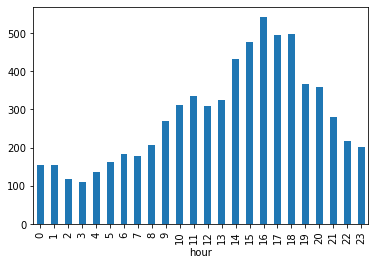

In [12]:
_.plot.bar(legend=False)

In [13]:
spark.sql('''
    SELECT 
        CASE 
            WHEN t.hour BETWEEN 6 AND 12 THEN 'Morning'
            WHEN t.hour BETWEEN 13 AND 22 THEN 'Evening'
            ELSE 'Night'
        END as result,
        COUNT(*) as total
    FROM 
        songplays AS s
        JOIN time AS t ON s.start_time = t.start_time
    GROUP BY result
    ORDER BY result
''').toPandas().set_index('result')

,total
result,
Evening,3991
Morning,1795
Night,1034


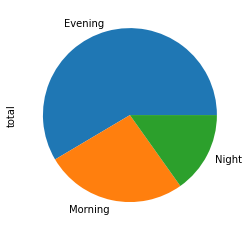

In [14]:
_.plot.pie(y='total', legend=False)

### Most Popular Times Per Day of Week

In [15]:
spark.sql('''
    SELECT 
        t.weekday,
        COUNT(*) as total
    FROM 
        songplays AS s
        JOIN time AS t ON s.start_time = t.start_time
    GROUP BY t.weekday
    ORDER BY t.weekday
''').toPandas().set_index('weekday')

,total
weekday,
1,396
2,1014
3,1071
4,1364
5,1052
6,1295
7,628


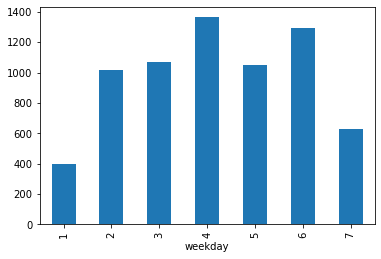

In [16]:
_.plot.bar(legend=False)

In [17]:
spark.sql('''
    SELECT 
        CASE 
            WHEN t.weekday BETWEEN 0 AND 4 THEN 'weekday'
            ELSE 'weekend'
        END as result,
        COUNT(*) as total
    FROM 
        songplays AS s
        JOIN time AS t ON s.start_time = t.start_time
    GROUP BY result
    ORDER BY result
''').toPandas().set_index('result')

,total
result,
weekday,3845
weekend,2975


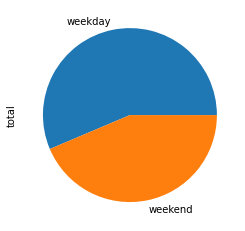

In [18]:
_.plot.pie(y='total', legend=False)